In [71]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean
import shlex
import subprocess
import pprint
import os

def runlike(prog,inp,verbose=False):
    command = "../src/like/./"+prog+" "+inp
    if verbose:
        command += " 1"
    
    process = subprocess.Popen(shlex.split(command), stdout=subprocess.PIPE)
    while True:
        output = process.stdout.readline()
        if process.poll()==0:
            break
        if output:
            print(output.strip().decode("utf-8"))
    rc = process.poll()
    return rc


# Set program, nucleus, and mass
prog = 'runDL_vs_Exposure'
Nuc = Ar40
m_chi = 5000.0

# Nuc = Xe131
# m_chi = 100.0

fname_finallim = mylimit_dir+'DL1D_'+Nuc.Name+'_'+str(int(m_chi))+'GeV'

In [72]:
# Energy binning
E_th = 4.0
E_max = 200.0
nTot_bins = 30
E_edges = logspace(log10(E_th),log10(E_max),nTot_bins+1)

# Range of exposures
n_ex = 100
ex_vals = logspace(0,7,n_ex)

# WIMP rate
dR = dRdE_wimp(E_edges,array([67.0+Jan1]),WIMP(m_chi,1.0e-45),Nuc=Nuc)
R_wimp = 0.5*(dR[1:]+dR[0:-1])*(E_edges[1:]-E_edges[0:-1])
dat1 = zeros(shape=(n_ex,nTot_bins+1))
for i in range(0,n_ex):
    dat1[i,1:] = R_wimp
dat1[:,0] = ex_vals 

# Neutrino rate
Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(E_th,Nuc=Nuc)
dR = AllNuRates(E_edges,67.0+Jan1,Solar,E_nu_all,Flux_all,Nuc=Nuc)
n_nu = shape(Flux_all)[0]
R_nu = zeros(shape=(n_nu,nTot_bins))
for i in range(0,n_nu):
    R_nu[i,:] = 0.5*(dR[i,1:]+dR[i,0:-1])*(E_edges[1:]-E_edges[0:-1])
dat2 = zeros(shape=(n_nu,nTot_bins+2))
dat2[:,2:] = R_nu
dat2[:,0] = Flux_norm 
dat2[:,1] = Flux_err

# Range of uncertainties
ferrs = array([1.0,2.0,4.0,8.0,16.0,32.0,50.0])
nerrs = size(ferrs)
lim = zeros(shape=(nerrs,n_ex))
    
for i in range(0,nerrs):
    inp = Nuc.Name+'_'+str(int(m_chi))+'GeV_'+str(int(ferrs[i]))+'pc'
    fname_sig = recoil_dir+'RD_sig_'+inp+'.txt'
    fname_bg = recoil_dir+'RD_bg_'+inp+'.txt'
    fname_lim = mylimit_dir+'DL1D_'+inp+'.txt'
    dat2[Names=='Atm',1] = ferrs[i]/100.0

    savetxt(fname_sig,dat1,header=str(n_ex)+' '+str(nTot_bins))
    savetxt(fname_bg,dat2,header=str(n_nu)+' '+str(nTot_bins))
    rc = runlike(prog,inp)
    lim[i,:] = loadtxt(fname_lim)
    
    os.remove(fname_lim) 
    os.remove(fname_sig) 
    os.remove(fname_bg)
datsave = zeros(shape=(nerrs+1,n_ex+1))
datsave[0,1:] = ex_vals
datsave[1:,0] = ferrs
datsave[1:,1:] = lim
savetxt(fname_finallim,datsave)

====NuFloor====
Reading Ar_5000GeV_1pc
nTot_bins =          30
n_nu =           5
n_ex =         100
R_bg_err =   0.29999999999999999        2.0000000000000000E-002  0.50000000000000000        1.0000000000000000E-002   8.0000000000000002E-002
R_bg =    7980.0000000000000        5160000.0000000000        85.700000000000003        10.699999999999999        3060000.0000000000
1 of         100 Exposure =    1.0000000000000000      ton-year
2 of         100 Exposure =    1.1768119524349985      ton-year
3 of         100 Exposure =    1.3848863713938731      ton-year
4 of         100 Exposure =    1.6297508346206442      ton-year
5 of         100 Exposure =    1.9179102616724886      ton-year
6 of         100 Exposure =    2.2570197196339201      ton-year
7 of         100 Exposure =    2.6560877829466860      ton-year
8 of         100 Exposure =    3.1257158496882362      ton-year
9 of         100 Exposure =    3.6783797718286335      ton-year
10 of         100 Exposure =    4.32876128108305

16 of         100 Exposure =    11.497569953977356      ton-year
17 of         100 Exposure =    13.530477745798068      ton-year
18 of         100 Exposure =    15.922827933410922      ton-year
19 of         100 Exposure =    18.738174228603839      ton-year
20 of         100 Exposure =    22.051307399030456      ton-year
21 of         100 Exposure =    25.950242113997358      ton-year
22 of         100 Exposure =    30.538555088334157      ton-year
23 of         100 Exposure =    35.938136638046274      ton-year
24 of         100 Exposure =    42.292428743894988      ton-year
25 of         100 Exposure =    49.770235643321087      ton-year
26 of         100 Exposure =    58.570208180566645      ton-year
27 of         100 Exposure =    68.926121043496948      ton-year
28 of         100 Exposure =    81.113083078968685      ton-year
29 of         100 Exposure =    95.454845666183374      ton-year
30 of         100 Exposure =    112.33240329780277      ton-year
31 of         100 Exposur

36 of         100 Exposure =    298.36472402833374      ton-year
37 of         100 Exposure =    351.11917342151310      ton-year
38 of         100 Exposure =    413.20124001153346      ton-year
39 of         100 Exposure =    486.26015800653533      ton-year
40 of         100 Exposure =    572.23676593502148      ton-year
41 of         100 Exposure =    673.41506577508210      ton-year
42 of         100 Exposure =    792.48289835391699      ton-year
43 of         100 Exposure =    932.60334688321996      ton-year
44 of         100 Exposure =    1097.4987654930555      ton-year
45 of         100 Exposure =    1291.5496650148841      ton-year
46 of         100 Exposure =    1519.9110829529332      ton-year
47 of         100 Exposure =    1788.6495290574351      ton-year
48 of         100 Exposure =    2104.9041445120197      ton-year
49 of         100 Exposure =    2477.0763559917091      ton-year
50 of         100 Exposure =    2915.0530628251759      ton-year
51 of         100 Exposur

56 of         100 Exposure =    7742.6368268112701      ton-year
57 of         100 Exposure =    9111.6275611548863      ton-year
58 of         100 Exposure =    10722.672220103232      ton-year
59 of         100 Exposure =    12618.568830660210      ton-year
60 of         100 Exposure =    14849.682622544635      ton-year
61 of         100 Exposure =    17475.284000076830      ton-year
62 of         100 Exposure =    20565.123083486516      ton-year
63 of         100 Exposure =    24201.282647943834      ton-year
64 of         100 Exposure =    28480.358684357991      ton-year
65 of         100 Exposure =    33516.026509388408      ton-year
66 of         100 Exposure =    39442.060594376562      ton-year
67 of         100 Exposure =    46415.888336127726      ton-year
68 of         100 Exposure =    54622.772176843369      ton-year
69 of         100 Exposure =    64280.731172843189      ton-year
70 of         100 Exposure =    75646.332755462907      ton-year
71 of         100 Exposur

76 of         100 Exposure =    200923.30025650459      ton-year
77 of         100 Exposure =    236448.94126454071      ton-year
78 of         100 Exposure =    278255.94022071257      ton-year
79 of         100 Exposure =    327454.91628777247      ton-year
80 of         100 Exposure =    385352.85937105276      ton-year
81 of         100 Exposure =    453487.85081285820      ton-year
82 of         100 Exposure =    533669.92312063021      ton-year
83 of         100 Exposure =    628029.14418342465      ton-year
84 of         100 Exposure =    739072.20335257752      ton-year
85 of         100 Exposure =    869749.00261778338      ton-year
86 of         100 Exposure =    1023531.0218990247      ton-year
87 of         100 Exposure =    1204503.5402587811      ton-year
88 of         100 Exposure =    1417474.1629268047      ton-year
89 of         100 Exposure =    1668100.5372000590      ton-year
90 of         100 Exposure =    1963040.6500402684      ton-year
91 of         100 Exposur

96 of         100 Exposure =    5214008.2879996849      ton-year
97 of         100 Exposure =    6135907.2734131636      ton-year
98 of         100 Exposure =    7220809.0183854559      ton-year
99 of         100 Exposure =    8497534.3590864390      ton-year
100 of         100 Exposure =    10000000.000000000      ton-year
Time elapsed =    127.669456
=====DONE=====
====NuFloor====
Reading Ar_5000GeV_50pc
nTot_bins =          30
n_nu =           5
n_ex =         100
R_bg_err =   0.29999999999999999        2.0000000000000000E-002  0.50000000000000000       0.50000000000000000        8.0000000000000002E-002
R_bg =    7980.0000000000000        5160000.0000000000        85.700000000000003        10.699999999999999        3060000.0000000000
1 of         100 Exposure =    1.0000000000000000      ton-year
2 of         100 Exposure =    1.1768119524349985      ton-year
3 of         100 Exposure =    1.3848863713938731      ton-year
4 of         100 Exposure =    1.6297508346206442      ton-ye

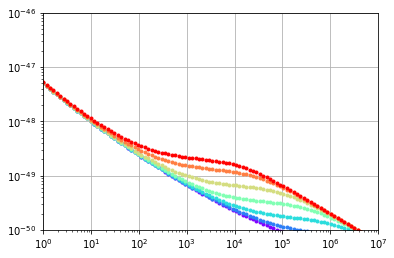

In [70]:
lim = loadtxt(fname_finallim)
sig = lim[1:,1:]
ferrs = lim[1:,0]
ex_vals = lim[0,1:]
nerrs = size(ferrs)
cols = cm.rainbow(linspace(0,1,nerrs))
for i in range(0,nerrs):
    plt.plot(ex_vals,sig[i,:],'.',lw=3,color=cols[i,:])
plt.xscale('log')
plt.yscale('log')
plt.xlim([ex_vals[0],ex_vals[-1]])
ymin = 1.0e-50
ymax = 1.0e-46
plt.ylim([ymin,ymax])
plt.grid()